### Import

In [1]:
if (!requireNamespace("BiocManager")) install.packages("BiocManager")
BiocManager::install(c("clusterProfiler", "DOSE", "enrichplot", "org.Mm.eg.db"))

Loading required namespace: BiocManager

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'DOSE' 'enrichplot' 'org.Mm.eg.db'"
Installing package(s) 'clusterProfiler'



package 'clusterProfiler' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shaoq\AppData\Local\Temp\RtmpsPZxP0\downloaded_packages


Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.1.1/library
  packages:
    survival

Old packages: 'batchelor', 'biomaRt', 'ensembldb', 'GenomicFeatures', 'ggtree',
  'GOSemSim', 'Rsubread', 'rtracklayer'



In [2]:
install.packages(c("ggnewscale", "ggridges", "ggupset"))

Installing packages into 'C:/Users/shaoq/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggnewscale' successfully unpacked and MD5 sums checked
package 'ggridges' successfully unpacked and MD5 sums checked
package 'ggupset' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shaoq\AppData\Local\Temp\RtmpsPZxP0\downloaded_packages


In [ ]:
library(clusterProfiler)
library(DOSE)
library(enrichplot)
library(ggnewscale)
library(ggplot2)
library(ggupset)
library(org.Mm.eg.db)

## read data

In [ ]:
d <- read.csv("./output/forGO_up.csv", col.names = c("SYMBOL", "logFC"))
# d <- read.csv('./forGO_up.csv', col.names = c('SYMBOL', 'logFC')) assume that
# 1st column is ID 2nd column is fold change
head(d)

,SYMBOL,logFC
,<chr>,<dbl>
1,Gm26901,1.0954985
2,1700034P13Rik,3.4385196
3,Gm39590,2.8589196
4,Pi15,0.5589248
5,4933424G06Rik,0.9383129
6,Gm39633,0.9589618


In [ ]:
ids <- data.frame(mapIds(org.Mm.eg.db, d$SYMBOL, "ENTREZID", "SYMBOL"))[, 1]

'select()' returned 1:1 mapping between keys and columns



In [ ]:
## feature 1: numeric vector
geneList <- d[, 2]
## feature 2: named vector
names(geneList) <- as.character(ids)
## feature 3: decreasing order
geneList <- sort(geneList, decreasing = TRUE)
head(geneList)
length(geneList)

102640189    442796     77855     73331 102635951     69412 
 4.203529  4.112260  3.706309  3.438520  3.415333  3.037015

[1] 721

In [ ]:
de <- names(geneList)[abs(geneList) > 0]
length(de)

[1] 721

## enrichGo analysis

In [ ]:
ego_bp <- enrichGO(gene = de, OrgDb = "org.Mm.eg.db", keyType = "ENTREZID", ont = "BP",
    pvalueCutoff = 1, pAdjustMethod = "none", qvalueCutoff = 1, minGSSize = 10, maxGSSize = 500,
    readable = TRUE, pool = FALSE)
ego_mf <- enrichGO(gene = de, OrgDb = "org.Mm.eg.db", keyType = "ENTREZID", ont = "MF",
    pvalueCutoff = 1, pAdjustMethod = "none", qvalueCutoff = 1, minGSSize = 10, maxGSSize = 500,
    readable = TRUE, pool = FALSE)
ego_cc <- enrichGO(gene = de, OrgDb = "org.Mm.eg.db", keyType = "ENTREZID", ont = "CC",
    pvalueCutoff = 1, pAdjustMethod = "none", qvalueCutoff = 1, minGSSize = 10, maxGSSize = 500,
    readable = TRUE, pool = FALSE)

In [ ]:
summary(ego_mf)

Warning message in summary(ego_mf):
"summary method to convert the object to data.frame is deprecated, please use as.data.frame instead."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0071855,GO:0071855,neuropeptide receptor binding,5/445,36/22682,0.0006488514,0.0006488514,0.2109564,Nmu/Tac1/Pomc/Ucn2/Nmb,5
GO:0005201,GO:0005201,extracellular matrix structural constituent,10/445,150/22682,0.0007782857,0.0007782857,0.2109564,Dmbt1/Col6a6/Hmcn2/Col13a1/Impg2/Col7a1/Mmrn2/Matn4/Col23a1/Hmcn1,10
GO:0048018,GO:0048018,receptor ligand activity,20/445,499/22682,0.0021924351,0.0021924351,0.3149794,Gdf15/Fgf22/Tac1/Wnt16/C1qtnf4/Nppb/Cer1/Wnt2b/Sema3e/Flt3l/Bmp8a/Mdk/Pomc/Il7/Sectm1b/Tnfsf13b/Ucn2/Nmb/Areg/Vegfd,20
GO:0019841,GO:0019841,retinol binding,3/445,14/22682,0.0023241201,0.0023241201,0.3149794,Crabp2/Adh7/Stra6,3
GO:0042608,GO:0042608,T cell receptor binding,3/445,17/22682,0.0041562990,0.0041562990,0.3362294,Cd1d1/H2-T23/Eps8l1,3
GO:0005501,GO:0005501,retinoid binding,4/445,34/22682,0.0042549297,0.0042549297,0.3362294,Ugt1a1/Crabp2/Adh7/Stra6,4
GO:0005125,GO:0005125,cytokine activity,11/445,229/22682,0.0057776840,0.0057776840,0.3362294,Gdf15/Wnt16/C1qtnf4/Cer1/Wnt2b/Flt3l/Bmp8a/Il7/Sectm1b/Tnfsf13b/Areg,11
GO:0019840,GO:0019840,isoprenoid binding,4/445,37/22682,0.0057866947,0.0057866947,0.3362294,Ugt1a1/Crabp2/Adh7/Stra6,4
GO:0030020,GO:0030020,extracellular matrix structural constituent conferring tensile strength,4/445,38/22682,0.0063690598,0.0063690598,0.3362294,Col6a6/Col13a1/Col7a1/Col23a1,4


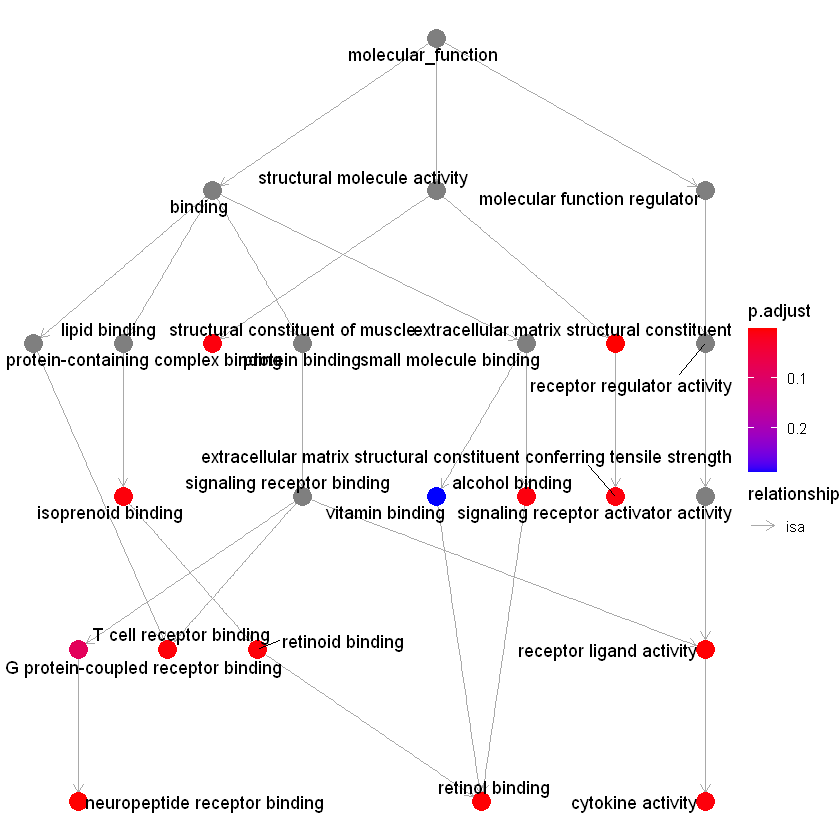

In [ ]:
goplot(ego_mf, size=100)

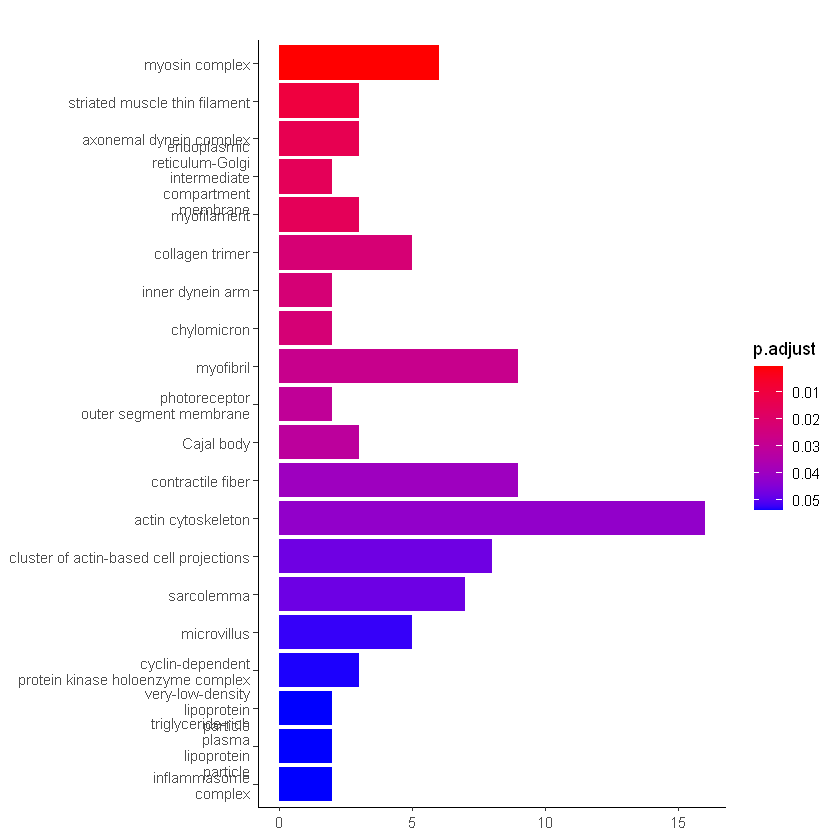

In [ ]:
barplot(ego_cc, showCategory = 20, label_format = 18) + theme_classic()

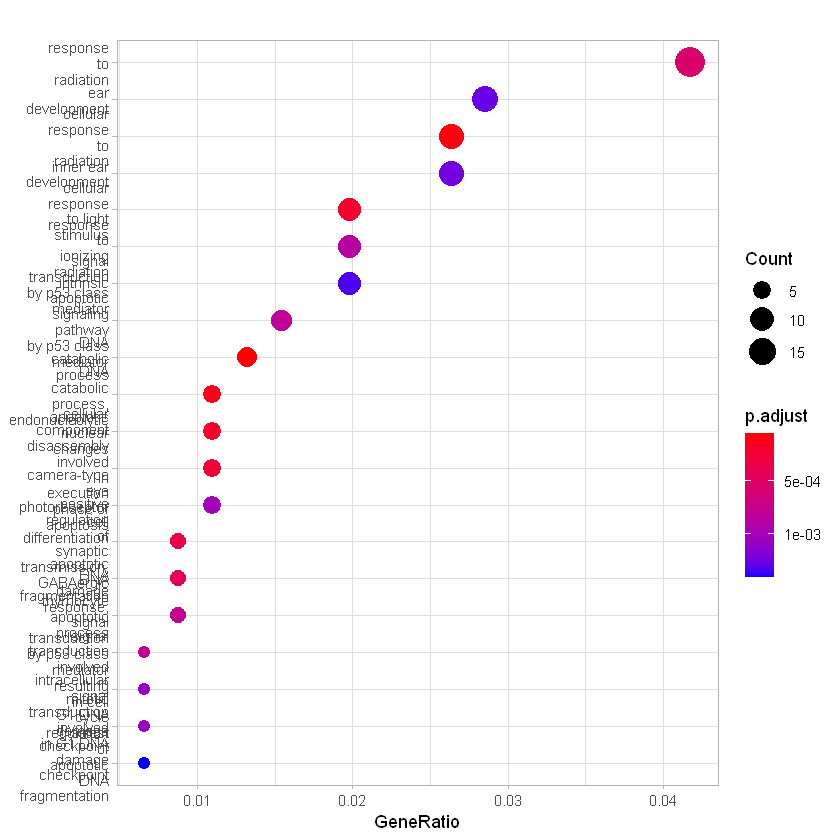

In [ ]:
dotplot(ego_bp, showCategory = 20, label_format = 10) + theme_light()

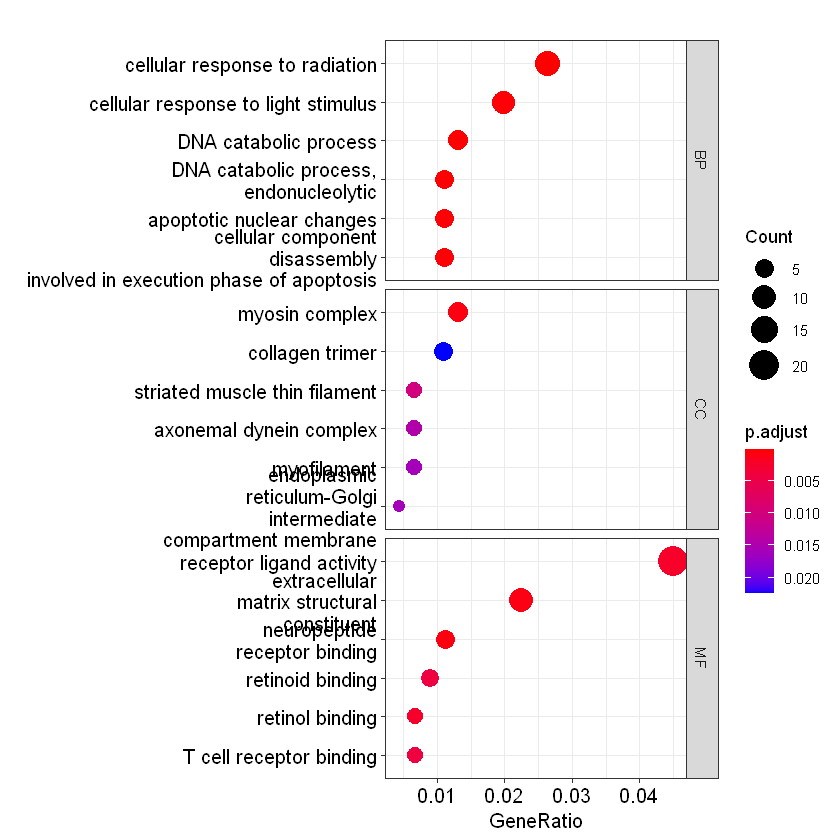

In [ ]:
go <- enrichGO(de, OrgDb = "org.Mm.eg.db", ont = "all", pvalueCutoff = 1, pAdjustMethod = "none",
    qvalueCutoff = 1)
dotplot(go, split = "ONTOLOGY", showCategory = 6, label_format = 20) + facet_grid(ONTOLOGY ~
    ., scale = "free")

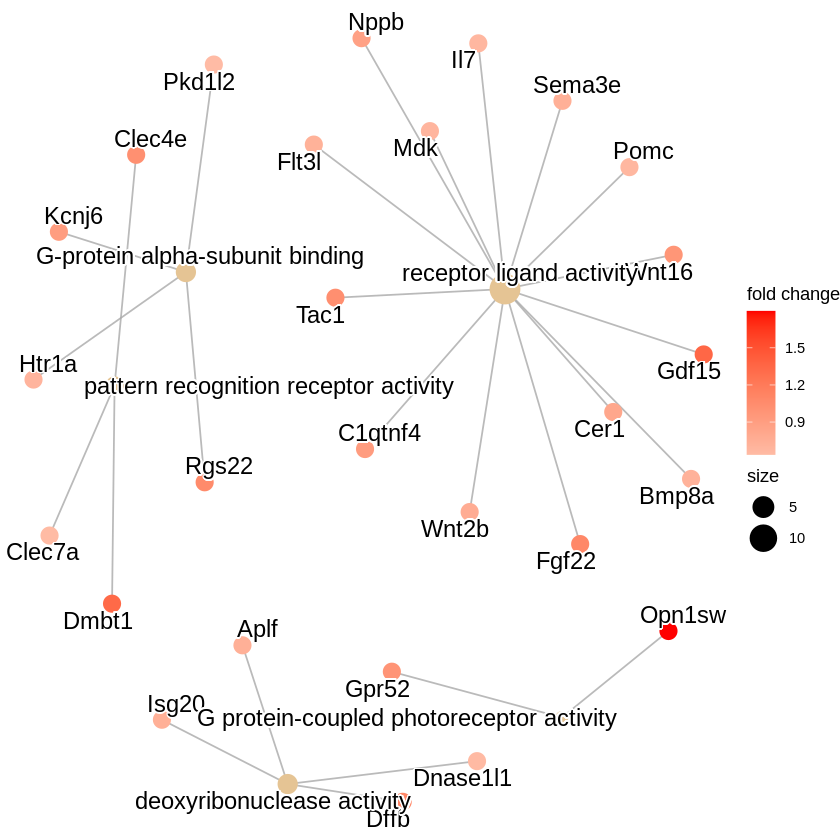

In [ ]:
## remove redundent GO terms ego2 <- simplify(ego_mf)
cnetplot(ego_mf, foldChange = geneList, node_label = "all", layout = "kk")

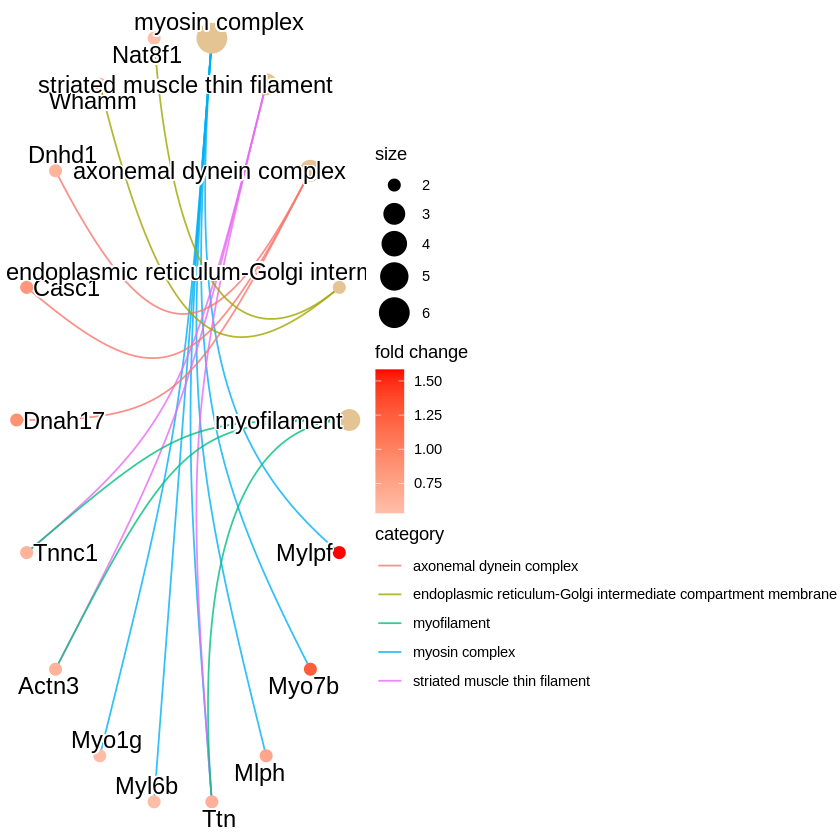

In [ ]:
cnetplot(ego_cc, foldChange = geneList, layout = "kk", circular = TRUE, colorEdge = TRUE)

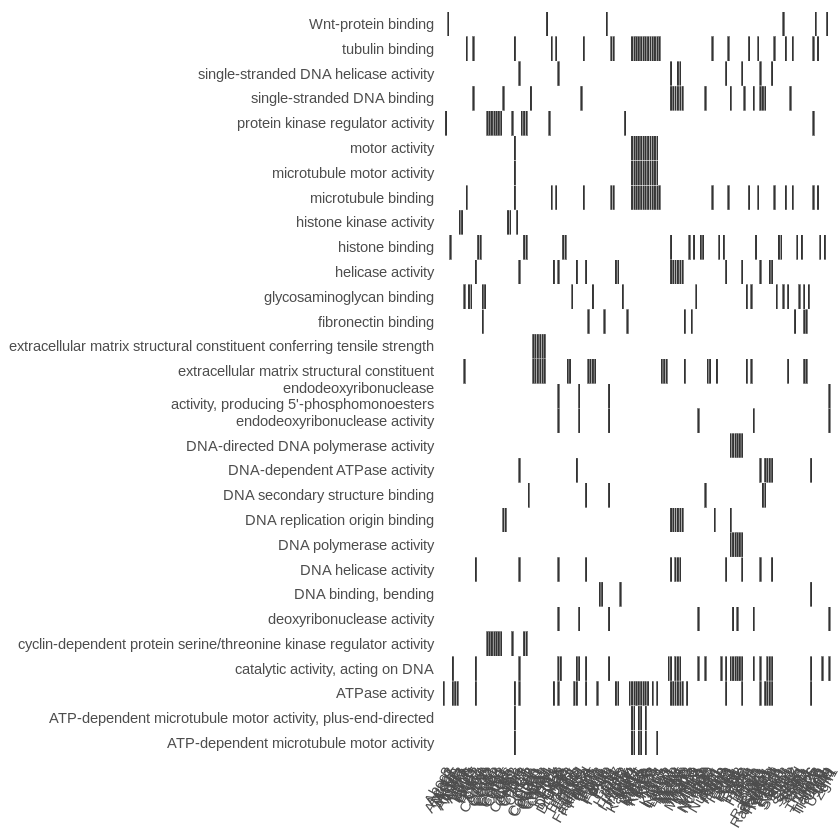

In [ ]:
heatplot(ego_mf)

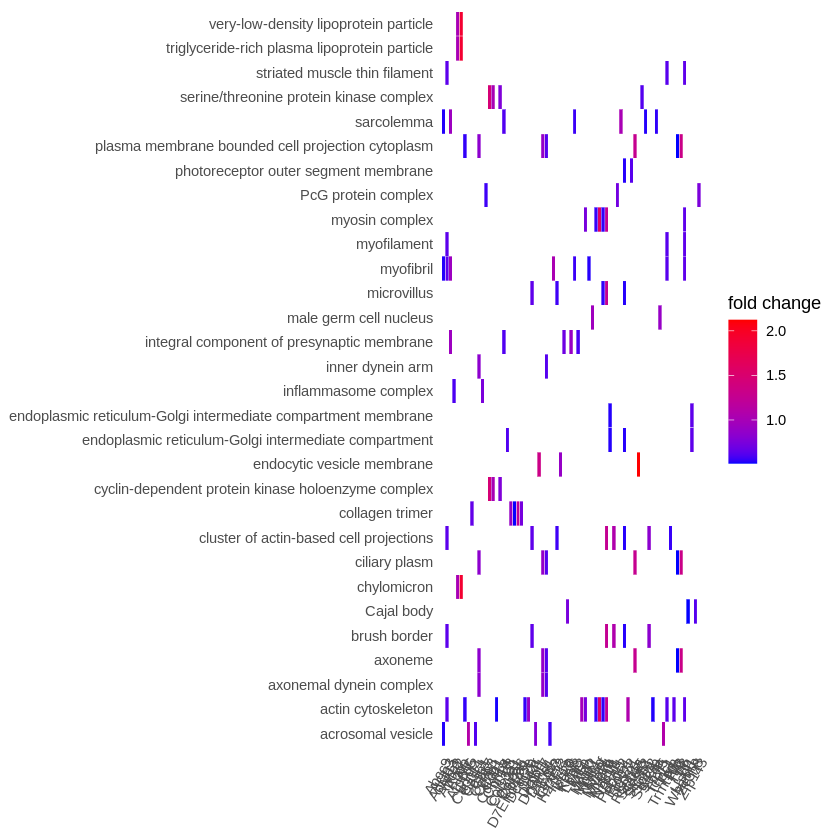

In [ ]:
heatplot(ego_cc, foldChange=geneList, label)

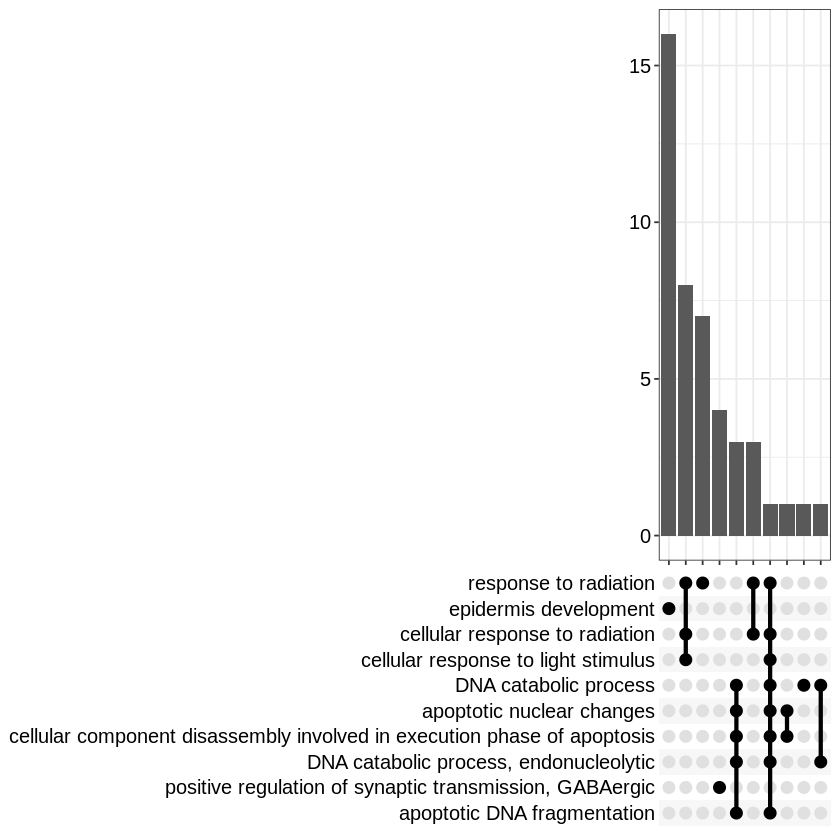

In [ ]:
upsetplot(ego_bp)

In [ ]:
edo2 <- enrichKEGG(names(geneList), organism = "mmu")

Reading KEGG annotation online:


Reading KEGG annotation online:




In [ ]:
summary(edo2)

Warning message in summary(edo2):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
mmu04115,mmu04115,p53 signaling pathway,20/424,72/8924,6.989263e-11,2.089789e-08,1.912851e-08,20724/170770/12450/12575/21933/230784/13197/17873/12028/17246/11783/57913/64058/23882/22401/98376/58801/12122/12452/55948,20
mmu01524,mmu01524,Platinum drug resistance,14/424,80/8924,2.045311e-05,3.057740e-03,2.798847e-03,170770/14860/14872/12575/12028/17246/11783/14866/14870/14865/58801/12122/22590/11796,14
mmu04210,mmu04210,Apoptosis,18/424,136/8924,7.262204e-05,6.973656e-03,6.383210e-03,13368/170770/21933/13197/17873/12028/11783/57913/22145/16188/22146/23882/12368/58801/12122/11796/13033/14281,18
mmu00512,mmu00512,Mucin type O-glycan biosynthesis,8/424,32/8924,9.329306e-05,6.973656e-03,6.383210e-03,207839/72297/20448/20447/59048/14425/56336/233733,8
mmu05216,mmu05216,Thyroid cancer,8/424,37/8924,2.778483e-04,1.661533e-02,1.520854e-02,18510/12575/27015/13197/17873/12028/12550/23882,8
mmu00980,mmu00980,Metabolism of xenobiotics by cytochrome P450,11/424,73/8924,6.059389e-04,2.993437e-02,2.739988e-02,394436/14860/14872/11670/13076/11529/13849/14866/14870/14865/109857,11
mmu05217,mmu05217,Basal cell carcinoma,10/424,63/8924,7.008045e-04,2.993437e-02,2.739988e-02,93735/12575/22414/27015/13197/17873/12028/23882/13542/216795,10


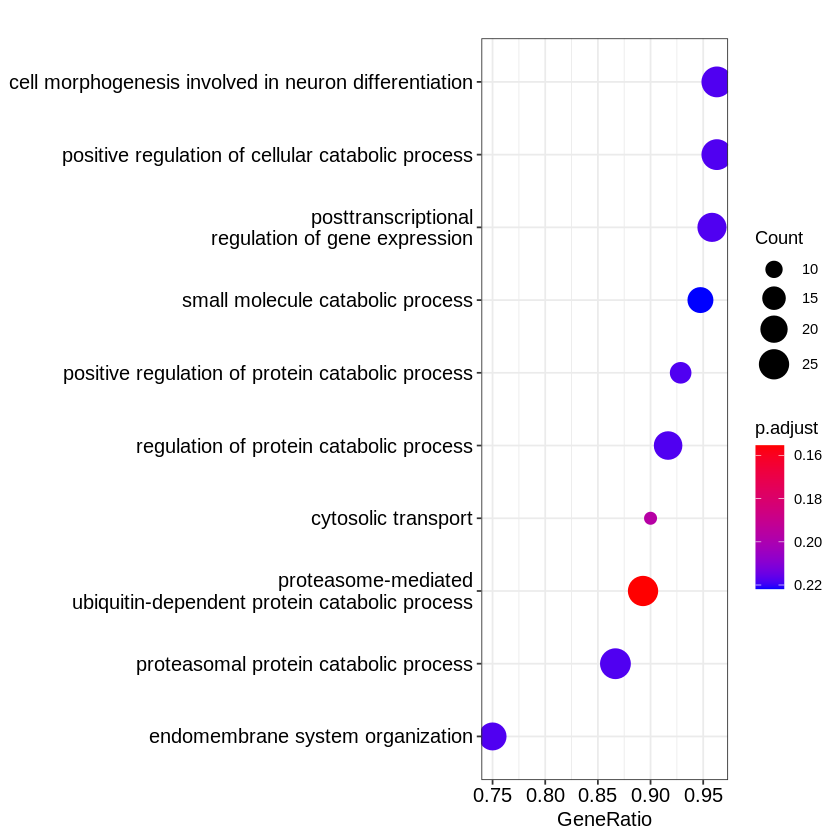

In [ ]:
dotplot(ego3)

In [ ]:
ego3 <- gseGO(geneList     = geneList,
              OrgDb        = org.Mm.eg.db,
              ont          = "BP",         
              pvalueCutoff = 1,
              verbose      = FALSE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in fgseaMultilevel(...):
“There were 213 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”


In [ ]:
summary(ego3)

Warning message in summary(ego3):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0043161,GO:0043161,proteasome-mediated ubiquitin-dependent protein catabolic process,28,-0.3721355,-2.402566,0.0001609608,0.1553271,0.1511337,606,"tags=89%, list=45%, signal=50%",20620/14794/14466/79263/72053/13542/26442/71816/12328/19164/100494/230904/19171/27362/217069/30843/50754/67812/105193/53312/108159/20747/68867/110616/68818
GO:0016482,GO:0016482,cytosolic transport,10,-0.6475904,-2.461473,0.0004074473,0.1965933,0.1912858,479,"tags=100%, list=36%, signal=65%",101240/77963/233204/54399/192652/14339/74349/319613/16558
GO:0010498,GO:0010498,proteasomal protein catabolic process,30,-0.3214031,-2.212197,0.0009521580,0.2179971,0.2121117,606,"tags=87%, list=45%, signal=49%",20620/14794/14466/79263/72053/103554/13542/26442/71816/12328/19164/100494/230904/19171/27362/217069/30843/50754/67812/105193/53312/108159/20747/68867/110616/68818
GO:0010256,GO:0010256,endomembrane system organization,28,-0.3097322,-1.999680,0.0018930958,0.2179971,0.2121117,444,"tags=75%, list=33%, signal=51%",18412/77963/54194/67023/74166/99371/232664/219149/74122/105513/14339/227753/101187/68385/74349/19338/103694/27883/228545/19275/19156
GO:0048667,GO:0048667,cell morphogenesis involved in neuron differentiation,27,-0.3203661,-1.958285,0.0019280716,0.2179971,0.2121117,919,"tags=100%, list=69%, signal=32%",230735/574437/12904/332309/97031/212168/11838/104360/545428/13636/22368/12322/11858/216049/13542/16885/432530/19164/65079/16782/22223/21367/20354/20266/78808/56336
GO:0010608,GO:0010608,posttranscriptional regulation of gene expression,24,-0.3333333,-1.956661,0.0019333266,0.2179971,0.2121117,901,"tags=100%, list=67%, signal=33%",387155/230784/194952/231002/217827/12227/17872/16210/75284/52502/232164/217869/17347/18626/270086/76850/98985/16418/211948/68134/22121/380669/17874
GO:0042176,GO:0042176,regulation of protein catabolic process,24,-0.3325991,-1.952352,0.0019333266,0.2179971,0.2121117,699,"tags=92%, list=52%, signal=45%",17246/12550/13636/20620/14466/20617/14756/79263/20660/73914/13542/101240/71816/12328/19164/72175/100494/11501/77128/50754/53312/110616
GO:0031331,GO:0031331,positive regulation of cellular catabolic process,27,-0.3198425,-1.955084,0.0020302197,0.2179971,0.2121117,788,"tags=96%, list=59%, signal=40%",230784/94088/12028/17246/231002/20620/12227/14466/20617/14756/257632/13542/71816/216805/19164/100494/11501/76681/12122/50754/66853/53312/117150/380669/67469/110616
GO:0045732,GO:0045732,positive regulation of protein catabolic process,14,-0.4833837,-2.224950,0.0020331337,0.2179971,0.2121117,699,"tags=100%, list=52%, signal=48%",20620/14466/14756/20660/13542/71816/19164/100494/11501/77128/50754/53312/110616
